Dataset taken from https://www.kaggle.com/c/digit-recognizer/data


####  Working on colab is preffered as dataset is huge



### Created by: Diksha Vedi

# Pre-processing of Data

In [1]:
# impoprting important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2

In [37]:
# read the dataset
df1 = pd.read_csv("/content/train.csv")

In [38]:
df1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
one = df1.iloc[2, 1:]
one.shape

(784,)

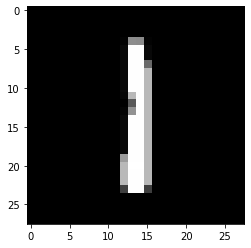

In [41]:
one_1 = one.values.reshape(28, 28)
plt.imshow(one_1, cmap='gray')

In [42]:
100*(round(df1.label.astype('category').value_counts()/len(df1.index), 4)) #show the total percentage of each number

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

In [43]:
df1.isnull().sum() # Check for missing values

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [44]:
df1.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [45]:
rowsdata = int((df1.shape[0])*(12/100)) # Specifying to take only 12% of the data
r1 = np.random.randint(0,df1.shape[0],rowsdata)  # Taking that 12% data at random
df = df1.iloc[r1,:]

In [46]:
df.shape

(5040, 785)

In [47]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
28379,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8590,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35243,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3589,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3111,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data Preparation for Model Building

Let's now prepare the dataset for building the model. We'll only use a 12% of the data else training will take a long time.


In [48]:
# Splitting the data into train and test
features = df.iloc[:, 1:]
target = df.iloc[:, 0]

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4032, 784)
(1008, 784)
(4032,)
(1008,)


In [49]:
col_name = list(x_train.columns)
col_name1 = list(x_test.columns)

In [50]:
#Min Max Scaling of the features
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train[col_name] = sc.fit_transform(x_train[col_name])
x_test[col_name1] = sc.fit_transform(x_test[col_name1])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

# Model Building
## we will build model using 3 types: linear, non linear(rbf), non linear using hypermeters using cross validation

### 1. Linear SVM

Let's first try building a linear SVM model (i.e. a linear kernel). 

In [51]:
from sklearn import svm
from sklearn import metrics
# SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear') # Making Model
svm_linear.fit(x_train, y_train) # Training Model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
# Predicting 
Y_pred = svm_linear.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix as conf_mat
cm = conf_mat(y_test,Y_pred) 
''' make confusion matirx  '''
print(cm)

[[ 93   0   0   0   0   3   0   0   0   0]
 [  0 103   1   0   1   1   0   0   0   0]
 [  1   1  90   2   1   0   0   2   1   0]
 [  0   1   1  89   0   0   1   0   3   0]
 [  0   1   3   0  99   0   0   0   0   0]
 [  0   0   1   4   3  77   3   0   0   1]
 [  0   0   0   0   1   2  96   0   1   0]
 [  0   4   2   1   0   1   1 103   0   2]
 [  0   7   2   7   4   2   1   1  79   0]
 [  0   1   0   2   4   1   0   5   3  88]]


In [54]:
from sklearn.metrics import classification_report as clas_rep
print(clas_rep(y_test,Y_pred)) #print the classification report

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        96
           1       0.87      0.97      0.92       106
           2       0.90      0.92      0.91        98
           3       0.85      0.94      0.89        95
           4       0.88      0.96      0.92       103
           5       0.89      0.87      0.88        89
           6       0.94      0.96      0.95       100
           7       0.93      0.90      0.92       114
           8       0.91      0.77      0.83       103
           9       0.97      0.85      0.90       104

    accuracy                           0.91      1008
   macro avg       0.91      0.91      0.91      1008
weighted avg       0.91      0.91      0.91      1008



In [55]:
from sklearn.metrics import accuracy_score as accuracy
accuracy(y_true=y_test, y_pred=Y_pred)

0.9097222222222222

### 2. Non-Linear SVM

Let's now try a non-linear model with the RBF kernel.

In [56]:
# rbf kernel
svm_non_linear = svm.SVC(kernel='rbf') # Building Model 
svm_non_linear.fit(x_train, y_train) # Training Model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
# predicting
Y_pred_nonl = svm_rbf.predict(x_test) 
print(accuracy(y_true=y_test, y_pred=Y_pred_nonl))

0.9444444444444444


### 3. Grid Search Cross-Validation
grid search CV to tune the hyperparameters C and gamma.

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = dict()
parameters['C'] = [1, 10, 100]
parameters['gamma']= [1e-2, 1e-3, 1e-4]
svc_grid_search = svm.SVC(kernel="rbf")
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')
result = clf.fit(x_train, y_train)

In [25]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.872067,0.040214,1.244064,0.013656,1,0.01,"{'C': 1, 'gamma': 0.01}",0.950434,0.945477,0.952854,0.929280,0.949132,0.945435,0.008422,3
1,6.108940,0.058864,1.621892,0.007971,1,0.001,"{'C': 1, 'gamma': 0.001}",0.897150,0.894672,0.895782,0.882134,0.888337,0.891615,0.005621,7
2,14.044616,0.136547,2.185667,0.029238,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.681537,0.695167,0.667494,0.677419,0.687345,0.681792,0.009310,9
3,3.294341,0.061695,1.112602,0.023474,10,0.01,"{'C': 10, 'gamma': 0.01}",0.951673,0.950434,0.959057,0.944169,0.951613,0.951389,0.004732,2
4,2.812420,0.041873,1.058762,0.009468,10,0.001,"{'C': 10, 'gamma': 0.001}",0.934325,0.938042,0.934243,0.908189,0.918114,0.926583,0.011489,4
5,5.882808,0.064672,1.617491,0.022568,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.897150,0.893432,0.894541,0.882134,0.888337,0.891119,0.005327,8
6,3.240788,0.039577,1.099395,0.016257,100,0.01,"{'C': 100, 'gamma': 0.01}",0.951673,0.950434,0.960298,0.944169,0.951613,0.951637,0.005143,1
7,2.220289,0.058188,0.903983,0.020979,100,0.001,"{'C': 100, 'gamma': 0.001}",0.925651,0.928129,0.931762,0.910670,0.920596,0.923361,0.007311,5
8,2.703850,0.050629,1.025847,0.011565,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.929368,0.931846,0.926799,0.901985,0.914392,0.920878,0.011193,6


In [26]:
print('Best Score:', result.best_score_)
print('Best Hyperparameters:',result.best_params_)

Best Score: 0.9516371944001157
Best Hyperparameters: {'C': 100, 'gamma': 0.01}


In [30]:
# Take best hyperparameters i.e. C=100, gamma=0.01
svm_final = svm.SVC(kernel='rbf', C=100, gamma=0.01) # model building
svm_final.fit(x_train, y_train) # fitting the model

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
Y_pred_gs = svm_final.predict(x_test)

In [32]:
cm2 = cm(y_true = y_test, y_pred = Y_pred_gs)
print("Accuracy : ",acc(y_true=y_test, y_pred=Y_pred_gs),'\n')
'''
Here cm is for metrics.confusion_matrix, GoTo 3rd cell of linear SVM to know more about cm
Here acc is for metrics.accuracy_score, GoTo last cell of linear SVM to know more about acc
'''
print(cm2,'\n')
print(cr(y_test,Y_pred_gs))

Accuracy :  0.9593253968253969 

[[ 76   0   0   0   0   0   0   0   0   0]
 [  0 123   0   0   1   0   0   0   0   0]
 [  2   0  91   1   1   0   0   1   0   0]
 [  0   1   0 114   0   1   0   0   1   0]
 [  0   0   1   0  85   0   1   0   0   2]
 [  1   0   0   1   0  73   0   0   0   1]
 [  2   2   0   0   3   1  87   0   0   0]
 [  0   0   4   0   0   0   0 116   0   2]
 [  0   0   0   2   0   0   1   1 111   2]
 [  0   0   0   2   3   0   0   0   0  91]] 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        76
           1       0.98      0.99      0.98       124
           2       0.95      0.95      0.95        96
           3       0.95      0.97      0.96       117
           4       0.91      0.96      0.93        89
           5       0.97      0.96      0.97        76
           6       0.98      0.92      0.95        95
           7       0.98      0.95      0.97       122
           8       0.99      0.95      0.97    

#Conclusion

## Accuarcy
### using Linear SVM: 0.9097222222222222
### using Non-Linear SVM: 0.9444444444444444
#### without using hyperparameter tuning: 0.9516371944001157
#### using hyperparameters tuning: 0.9593253968253969 
#### The final accuracy on test data is approx. 95.93%. Note that this can be significantly increased by using the entire training data of 42,000 images (we have used just 12% of that!). 